In [11]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

%run ../scripts/util_func.py
%run ../scripts/model_func.py

In [12]:
# import arrays

# doughnut1_icr_params = np.load('../data/icr_train_doughnut1.npy', allow_pickle=True) # [alpha_l, alpha_r, x_v, y_l, y_r] # full traj_optimization
doughnut1_icr_params = np.load('../data/EKF_params_doughnut1.npy', allow_pickle=True) # [alpha_l, alpha_r, x_v, y_l, y_r] # EKF params
doughnut1_icr_params = np.abs(doughnut1_icr_params)
doughnut1_icr_params[:2] = 1 / doughnut1_icr_params[:2]
# doughnut2_icr_params = np.load('../data/icr_train_doughnut2.npy', allow_pickle=True) # [alpha_l, alpha_r, x_v, y_l, y_r] # full traj_optimization
doughnut2_icr_params = np.load('../data/EKF_params_doughnut2.npy', allow_pickle=True) # [alpha_l, alpha_r, x_v, y_l, y_r] # EKF params
doughnut2_icr_params = np.abs(doughnut2_icr_params)
doughnut2_icr_params[:2] = 1 / doughnut2_icr_params[:2]
asphalt_icr_params = np.array([1 / 0.9, 1 / 0.92, 2.57, 4.66, 5.0])

print(doughnut1_icr_params)
print(doughnut2_icr_params)

[1.1094698016893838 1.1103468728196941 0.9981772531731594
 0.6097832050763476 0.22841896374886755]
[1.7580729864374882 1.367136040281131 0.22957687186596074
 0.8694925368092721 1.283174634720019]


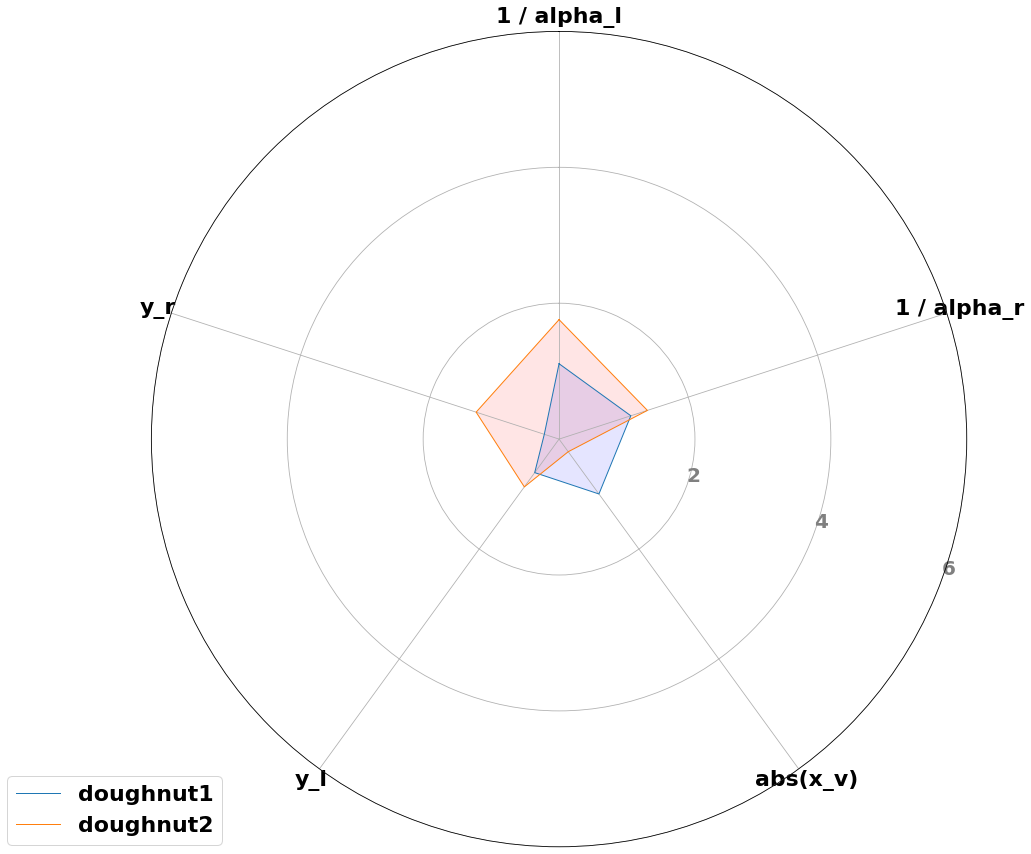

In [13]:
# ------- PART 1: Create background
 
# number of variable
categories=['1 / alpha_l', '1 / alpha_r', 'abs(x_v)', 'y_l', 'y_r']
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig_dim = 15.0
# fig = plt.figure(111)
# ax = fig.add_axes([fig_dim, fig_dim, fig_dim, fig_dim], polar=True)
ax = plt.subplot(111, polar=True)
ax.figure.set_size_inches(fig_dim, fig_dim)
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(110)
plt.yticks([2,4,6], ["2","4","6"], color="grey", size=20)
plt.ylim(0,6)

 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values = doughnut1_icr_params.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="doughnut1")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values = doughnut2_icr_params.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="doughnut2")
ax.fill(angles, values, 'r', alpha=0.1)

# # Ind3
# values = asphalt_icr_params.tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="asphalt")
# ax.fill(angles, values, 'g', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


plt.savefig('radar_icr_params.png', dpi=100)

plt.show()